# Predicting Obesity

### Describe columns

##### Other attributes 
|Questions|Possible Values|
|----------|-----------|
|Gender    | Male, Female |
|Age    | Numeric value|
|Height    |Numeric value in meters |
|Weight    |Numeric value in kg|

##### Attributes related with eating habits
|Questions|Possible Values|
|----------|-----------|
|Has family member suffered from being overweight|yes or no|
|FAVC (Frequent consumption of high calorie foods)|yes or no|
|Frequency of consumption of vegetables (FCVC)|never, sometimes, always|
|number of main meals (NCP)|between 1 and 2, 3, more than three|
|consumption of food between meals (CAEC)|no, sometimes, frequently, always|
|consumption of water daily (CH2O)|less than a liter, between 1 and 2 liter, more than 2 L |
|consumption of alcohol (CALC) | I do not drink, sometimes, frequently, always |

##### Attributes related to physical activity
|Questions|Possible Values|
|----------|-----------|
|Calories consumption monitoring (SCC) | yes, no |
|physical activity frequency (FAF) | no physical activity, 1 or 2 days per week, 2 or 4 days per week, 4 or 5 days per week |
|time using technology devices (TUE) | 0-2 hours per day, 3-5 hours per day, more than 5 hours |
|transportation used (MTRANS) | automobile, motorbike, bike, public transportation, walking |

##### Class variables NObesity was created with the following values: 
- Insufficient weight
- Normal weight 
- Overweight level I 
- Overweight level II
- Obesity type I 
- Obesity Type II 
- Obesity Type III 

### Import Libraries

In [689]:
import pandas as pd #dataframe library
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
import numpy as np #numpy provides N-dim object support

#do plotting inline instead of in seperate window
%matplotlib inline

### Load and review data

In [690]:
df = pd.read_csv("./obesity_data_set.csv")

In [691]:
df.shape

(2111, 17)

In [692]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [693]:
df.tail(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


### Check for null values

In [694]:
df.isnull().values.any()

False

### Check for correlation

In [695]:
def plot_corr(df, size: int=11):
    """
        Function plots graphical correlation matrix for each pair of columns in the dataframe
        Inputs: 
            df: pandas datafram
            size: vertical and horizontal size of the plot
        Displays:
            matrix of correlation between columns. Blue - cyan - yellow - red - darkred = less to more correlated
                                                    0 ---------------- 1 
                                                    Expect a darkred line running from top left to bottom right.
    """

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) #color mode the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw the x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw the y tick marks

/var/folders/36/0c0g55xd545fr2j2y8t_m7z40000gn/T/ipykernel_13666/4264209331.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


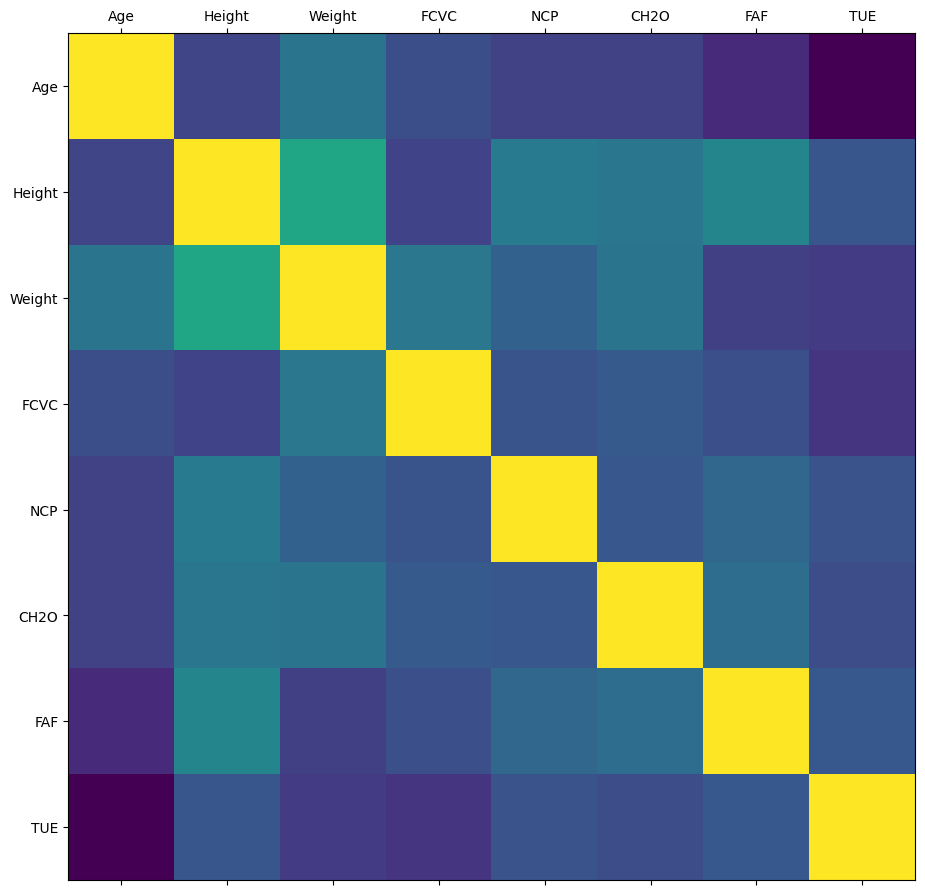

In [696]:
plot_corr(df)

### Check datatypes

In [697]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##### Change values that are non-numerical 

In [698]:
# create map dictionaries
gender_map = {"Male": 0, "Female": 1}
family_history_map = {"yes": 1, "no": 0}
favc_map = {"yes": 1, "no": 0}
caec_map = {"Always": 1.00, "Frequently": 0.67, "Sometimes": 0.33, "no": 0.00 }
smoke_map = {"yes": 1, "no": 0}
scc_map = {"yes": 1, "no": 0}
calc_map = {"Always": 1.00, "Frequently": 0.67, "Sometimes": 0.33, "no": 0.00 }
mtrans_map = {"Automobile": 1.00, "Motorbike": 0.75, "Bike": 0.50, "Public_Transportation": 0.25, "Walking": 0.00}
nobesity_map = {"Obesity_Type_III": 0, "Obesity_Type_II": 1, "Obesity_Type_I": 2, "Overweight_Level_II": 3, "Overweight_Level_I": 4, "Normal_Weight": 5, "Insufficient_Weight": 6}

In [699]:
df['Gender'] = df['Gender'].map(gender_map)
df['family_history_with_overweight'] = df['family_history_with_overweight'].map(family_history_map)
df['FAVC'] = df['FAVC'].map(favc_map)
df['CAEC'] = df['CAEC'].map(caec_map)
df['SMOKE'] = df['SMOKE'].map(smoke_map)
df['SCC'] = df['SCC'].map(scc_map)
df['CALC'] = df['CALC'].map(calc_map)
df['MTRANS'] = df['MTRANS'].map(mtrans_map)
df['NObeyesdad'] = df['NObeyesdad'].map(nobesity_map)

In [700]:
df.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,-0.048394,-0.618466,-0.161668,-0.102512,-0.064934,0.274505,-0.067600,0.092038,-0.044698,-0.107930,0.102633,-0.189607,-0.017269,0.007186,-0.137378,-0.031464
Age,-0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,-0.084867,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.045118,0.602317,-0.282913
Height,-0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,-0.050283,0.055499,0.213376,-0.133753,0.294709,0.051912,0.129567,0.071616,-0.133565
Weight,-0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,-0.290461,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.205195,-0.005742,-0.913251
family_history_with_overweight,-0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,-0.172602,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.036714,0.099229,-0.505148
FAVC,-0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.151309,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.088492,0.071444,-0.247793
FCVC,0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.054386,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060264,-0.063746,-0.227759
NCP,-0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.097097,0.007811,0.057088,-0.015624,0.129504,0.036326,0.071132,0.052962,-0.026690
CAEC,0.092038,-0.084867,-0.050283,-0.290461,-0.172602,-0.151309,0.054386,0.097097,1.000000,0.055423,-0.144925,0.110140,0.030420,0.047769,-0.046334,-0.045968,0.332489
SMOKE,-0.044698,0.091987,0.055499,0.025746,0.017385,-0.050660,0.014320,0.007811,0.055423,1.000000,-0.031995,0.047731,0.011216,0.017613,0.083135,0.013098,-0.003442


#### Check if data has been changed correctly

In [701]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,0.33,0,2.0,0,0.0,1.0,0.00,0.25,5
1,1,21.0,1.52,56.0,1,0,3.0,3.0,0.33,1,3.0,1,3.0,0.0,0.33,0.25,5
2,0,23.0,1.80,77.0,1,0,2.0,3.0,0.33,0,2.0,0,2.0,1.0,0.67,0.25,5
3,0,27.0,1.80,87.0,0,0,3.0,3.0,0.33,0,2.0,0,2.0,0.0,0.67,0.00,4
4,0,22.0,1.78,89.8,0,0,2.0,1.0,0.33,0,2.0,0,0.0,0.0,0.33,0.25,3


#### Splitting the data

70% for training, 30% for testing

In [702]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
predicted_class_names = ['NObeyesdad']

X = df[feature_col_names].values # predictor feature columns (16 x m )
y = df[predicted_class_names].values # predicted class,  {"Obesity_Type_III": 1, "Obesity_Type_II": 0.85, "Obesity_Type_I": 0.7, "Overweight_Level_II": 0.55, "Overweight_Level_I": 0.4, "Normal_Weight": 0.2, "Insufficient_Weight": 0 }
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) # X_train and X_test arrays contain values of test and training feature columns, y_train and y_test contains values of predictor column
                                                                                                        # random_state could be set to any value, just ensures that if we were to run function again, split will be identical


We check to ensure that we have desired 70% train and 30% test split of the data

In [703]:
print("{0:0.2f}% in training".format((len(X_train) / len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test) / len(df.index)) * 100))

69.97% in training
30.03% in test set


#### Verifying predicted value was split correctly

In [704]:
print("Original Obese type III : {0} ({1:0.2f}%)".format(len(df.loc[df['NObeyesdad'] == 1]), len(df.loc[df['NObeyesdad'] == 1]) / len(df.index) * 100))
print("Original insufficient weight : {0} ({1:0.2f}%)".format(len(df.loc[df['NObeyesdad'] == 0]), len(df.loc[df['NObeyesdad'] == 0]) / len(df.index) * 100))
print("")
print("Training Obese type III : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), len(y_train[y_train[:] == 1]) / len(y_train) * 100))
print("Training insufficient weight : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), len(y_train[y_train[:] == 0]) / len(y_train) * 100))
print("")
print("Test Obese type III : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), len(y_test[y_test[:] == 1]) / len(y_test) * 100))
print("Test insufficient weight : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), len(y_test[y_test[:] == 0]) / len(y_test) * 100))



Original Obese type III : 297 (14.07%)
Original insufficient weight : 324 (15.35%)

Training Obese type III : 209 (14.15%)
Training insufficient weight : 226 (15.30%)

Test Obese type III : 88 (13.88%)
Test insufficient weight : 98 (15.46%)


### check for additional missing values

In [705]:
print("# of rows with missing age: {0}".format(len(df.loc[df['Age'] == 0])))
print("# of rows with missing weight: {0}".format(len(df.loc[df['Weight'] == 0])))
print("# of rows with missing height: {0}".format(len(df.loc[df['Height'] == 0])))

# of rows with missing age: 0
# of rows with missing weight: 0
# of rows with missing height: 0


### Training initial algorithm - Naive Bayes

In [706]:
from sklearn.naive_bayes import GaussianNB

#create Gaussian Naive Bayes model object and train it with data
nb_model = GaussianNB()

#? To make the model fit, had to convert all values to int of 0, 1, 2, 3, 4, 5 
nb_model.fit(X_train, y_train) # fit method creates a model trained with the training data

/Users/cristianordonez/.local/share/virtualenvs/nutrition_predictor-4Bb_akqN/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

#### Performance on training data

In [707]:
# Predict value using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy 
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.6127


#### Performance on testing data

In [708]:
#predict value using the testing data
nb_predict_test = nb_model.predict(X_test)
 
from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.6073


#### Metrics 

In [709]:
print("Confusion Matrix") # compares predicted and actual result, it is a table where the headers on x-axis will be the predicted value, and the value on y-axis will be number predicted 
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[97  0  1  0  0  0  0]
 [ 0 78  9  0  1  0  0]
 [ 0 27 64  4  5  2  0]
 [ 0  6 43 17  4  9  0]
 [ 0  0 44  4 26 11  3]
 [ 0  0  7  7 14 33 32]
 [ 0  0  9  0  3  4 70]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       0.70      0.89      0.78        88
           2       0.36      0.63      0.46       102
           3       0.53      0.22      0.31        79
           4       0.49      0.30      0.37        88
           5       0.56      0.35      0.43        93
           6       0.67      0.81      0.73        86

    accuracy                           0.61       634
   macro avg       0.62      0.60      0.58       634
weighted avg       0.62      0.61      0.59       634



### Random Forest training

In [710]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

#### Predict training data

In [711]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.0000


#### Predict test data

In [712]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.9338


#### Export the Random Forest model 

In [713]:
import joblib

joblib.dump(rf_model, 'rf_model.joblib')

['rf_model.joblib']

#### Metrics

In [714]:
print("Confusion Matrix") # compares predicted and actual result, it is a table where the headers on x-axis will be the predicted value, and the value on y-axis will be number predicted 
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))


Confusion Matrix
[[97  0  1  0  0  0  0]
 [ 0 87  1  0  0  0  0]
 [ 0  3 98  0  0  1  0]
 [ 0  0  0 72  4  3  0]
 [ 0  0  0  3 75 10  0]
 [ 0  0  0  0  9 83  1]
 [ 0  0  0  0  0  6 80]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       0.97      0.99      0.98        88
           2       0.98      0.96      0.97       102
           3       0.96      0.91      0.94        79
           4       0.85      0.85      0.85        88
           5       0.81      0.89      0.85        93
           6       0.99      0.93      0.96        86

    accuracy                           0.93       634
   macro avg       0.94      0.93      0.93       634
weighted avg       0.94      0.93      0.93       634



#### Cross validation to estimate performance of random forest

In [715]:
# use cross validation to estimate performance
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(rf_model, X_train, y_train.ravel(), cv=5)
print("Accuracy: {0:.2f} (+/- {1:.2f})".format(np.mean(scores), np.std(scores) * 2))


Accuracy: 0.95 (+/- 0.01)
[5]


### Logistic Regression

In [716]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7,  random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.6546
[[97  1  0  0  0  0  0]
 [ 1 79  8  0  0  0  0]
 [10 12 52 20  7  1  0]
 [ 3  6 16 25 18 11  0]
 [ 0  0 11 17 41 18  1]
 [ 2  0  3  7 16 47 18]
 [ 0  0  0  0  0 12 74]]

Classification report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        98
           1       0.81      0.90      0.85        88
           2       0.58      0.51      0.54       102
           3       0.36      0.32      0.34        79
           4       0.50      0.47      0.48        88
           5       0.53      0.51      0.52        93
           6       0.80      0.86      0.83        86

    accuracy                           0.65       634
   macro avg       0.63      0.65      0.64       634
weighted avg       0.64      0.65      0.64       634



/Users/cristianordonez/.local/share/virtualenvs/nutrition_predictor-4Bb_akqN/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
